<a href="https://colab.research.google.com/github/X4D0/DataVisualization/blob/main/Assignment3_1301184233.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Text Visualization using WordCloud
Rayhan Rahmanda<br>
1301184233<br>
IF-42-GAB03


## Intro

Tugas : Buatlah visualisasi wordcloud dari kumpulan opini/komentar terkait topik spesifik tertentu berbahasa Indonesia.


> Pada Tugas kali ini akan digunakan sebuah Dataset yang berisi Opini/Komentar/Review mengenai suatu barang atau produk yang ada di salah satu e-commerce yaitu BukaLapak. Lalu akan dicari kata-kata yang paling sering muncul pada kolom review dan memvisualisasikan nya menggunakan WordCloud.



## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Load Dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/BukaLapak_Review.csv', index_col=0)
df.head()

,header_review,review_sangat_singkat,label
id,,,
0,Mantap Barang Sesuai Pesanan,mantap barang sesuai pesanan,1
1,Mantaps.....,Mantaps.....,1
2,Barang Sesuai,Terima kasih buka lapaklapak barang sesuai den...,1
3,Barang Asli,Barang asli,1
4,Mmc 32 Gb. Samsung,Packing rapih barang sesuai pesanan dan ce...,1


## Use WordCloud

Tampilkan Basic Information mengenai Dataframe yang ada.

In [ ]:
text = " ".join(review for review in df.review_sangat_singkat)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 5146180 words in the combination of all review.


Visualize

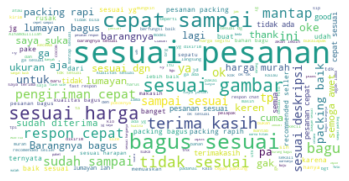

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["barang", "yang", "ke", "di", "adalah", "dan", "dengan", "maka", "sehingga", "nya", "jadi", "tapi", "juga"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Dari hasil diatas dapat terlihat bahwa mayoritas Review yang diberikan oleh para Customer terbilang Positif, dimana "Sesuai Pesanan" merupakan kalimat yang paling sering ditulis oleh Customer dan pada peringkat kedua terdapat kalimat "cepat sampai".

Selanjutnya yang akan kita lakukan adalah mengubah bentuk dari WordCloud tersebut ke dalam bentuk logo dari BukaLapak sebagai berikut agar bentuk nya semakin menarik untuk dilihat.

<img src='https://4.bp.blogspot.com/-qswR3aGv33Q/XvdEPPo3ZdI/AAAAAAAABVE/PAh0p7QywD8uDs2m1jSov6wM7GblPqt2gCLcBGAsYHQ/s1600/Artboard%2B3.png' width=100 height=100/>

### Masking

In [ ]:
bl_mask = np.array(Image.open("/content/drive/MyDrive/Colab Notebooks/Dataset/BukaLapak_Logo.png"))
bl_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

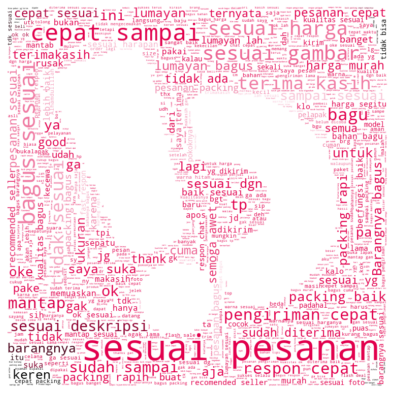

In [ ]:
# Generate a word cloud image
wordcloud_bukalapak = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=bl_mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(bl_mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_bukalapak.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()